# Capstone Project 20.1: Initial Report and Exploratory Data Analysis (EDA)

This project aims to predict sales outcomes by analyzing various data sources, such as connections, contact lists, social media traffic, and website traffic. By leveraging these inputs, the model will identify key features and patterns that influence sales performance. The goal is to enhance decision-making processes for businesses by providing insights into the most effective strategies for approaching potential clients.



# Rationale
Understanding the factors that contribute to successful sales is crucial for optimizing business strategies. By analyzing various data points related to social and professional networks, this project seeks to uncover the key drivers of sales success. This knowledge will allow businesses to allocate resources more effectively, minimize risks, and capitalize on opportunities, ultimately leading to increased revenue.

# Research Question
What are the most significant factors from social and professional networks that predict sales success?

# Data Sources
Connections: Information about personal and professional contacts.

Contact List: Detailed contact information including email, phone, and how long the person has been known.

Social Media Traffic: Data on engagement and reach across various social media platforms.

Website Traffic: Metrics related to visits, interactions, and conversions on the company’s website.


# Methodology
Data Preprocessing: Clean and organize data from various sources to create a comprehensive dataset.

Feature Engineering: Generate new features based on existing data, such as interaction frequency or decision-making power.

Model Comparison: Compare multiple classification models (e.g., Random Forest, SVM, XGBoost) to determine which provides the best performance.

Hyperparameter Tuning: Optimize model parameters to improve accuracy.

Feature Importance Analysis: Identify the most critical features contributing to the model’s predictions.

Visualization: Create plots to visualize model performance, feature importance, and predictions.


### Load the dataset

Use pandas to read in the dataset `Connections.csv` and assign to a meaningful variable name.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

In [22]:
# Load your dataset
data = pd.read_csv('data/Connections.csv')

In [9]:
data.head()

,First_Name,Last_Name,URL,Email_Address,Company,Position,DecisionMaker,KnownSince,KnownDays,Output_Target
0,Viktor,Ilovski,https://www.linkedin.com/in/viktor-ilovski-9ba...,NaN,Guardz,Cybersecurity Solutions Consultant,False,26-Jan-24,206,n
1,Tazeem,Nasreen,https://www.linkedin.com/in/tazeem-nasreen-sho...,NaN,MULTIINSIGHT,Chief Executive Officer,True,21-Dec-23,242,n
2,Mohamad,Nohayli,https://www.linkedin.com/in/mohamadnohayli,NaN,BCE (Buildingcodexperts),Managing Partner,False,14-Dec-23,249,n
3,Ryan,Castle,https://www.linkedin.com/in/ryanecastle,NaN,Conduit Security,Founder & CEO,True,19-Oct-23,305,n
4,Parham,Zomorodi,https://www.linkedin.com/in/parham-zomorodi-b6...,NaN,Ericsson,Technical Support Engineer,False,3-Oct-23,321,n


### Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input Variables:

Company	string
Position	string
DecisionMaker	boolean
KnownSince	date
KnownDays	number

Output Variables:

Output_Target	y or n
```



### Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First_Name     2055 non-null   object
 1   Last_Name      2055 non-null   object
 2   URL            2055 non-null   object
 3   Email_Address  40 non-null     object
 4   Company        2040 non-null   object
 5   Position       2042 non-null   object
 6   DecisionMaker  2055 non-null   bool  
 7   KnownSince     2055 non-null   object
 8   KnownDays      2055 non-null   int64 
 9   Output_Target  2055 non-null   object
dtypes: bool(1), int64(1), object(8)
memory usage: 146.6+ KB


In [11]:
# Understand the distribution of features.
# Visualize relationships between features and the target variable.
# Identify any potential outliers or anomalies.

In [12]:
# Drop unnecessary columns
data = data.drop(['First_Name', 'Last_Name', 'URL', 'Email_Address'], axis=1)

# Convert 'DecisionMaker' to boolean if not already
data['DecisionMaker'] = data['DecisionMaker'].astype(bool)

# Convert 'KnownSince' to datetime and create additional features like year, month, etc.
data['KnownSince'] = pd.to_datetime(data['KnownSince'])
data['KnownSince_Year'] = data['KnownSince'].dt.year
data['KnownSince_Month'] = data['KnownSince'].dt.month


C:\Users\nader\AppData\Local\Temp\ipykernel_9900\2564847699.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['KnownSince'] = pd.to_datetime(data['KnownSince'])


### Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the connections information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:

# Encode categorical variables
le = LabelEncoder()
data['Company'] = le.fit_transform(data['Company'])
data['Position'] = le.fit_transform(data['Position'])

# Define feature columns and target
X = data.drop(['Output_Target', 'KnownSince'], axis=1)  # Dropping 'KnownSince' as we've engineered new features
y = data['Output_Target'].map({'y': 1, 'n': 0})  # Encode target as 1/0

### Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




### A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:

# Define models
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

### Score the Model

Compare the accuracy of the models to check initial results of classifiers.

In [16]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Model')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('-'*50)
    



RandomForest Model
Accuracy: 0.8217179902755267
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       530
           1       0.35      0.30      0.32        87

    accuracy                           0.82       617
   macro avg       0.62      0.60      0.61       617
weighted avg       0.81      0.82      0.82       617

Confusion Matrix:
 [[481  49]
 [ 61  26]]
--------------------------------------------------
XGBoost Model
Accuracy: 0.8492706645056726
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       530
           1       0.47      0.51      0.49        87

    accuracy                           0.85       617
   macro avg       0.69      0.71      0.70       617
weighted avg       0.85      0.85      0.85       617

Confusion Matrix:
 [[480  50]
 [ 43  44]]
--------------------------------------------------


###  Visualize Model Comparisons

We aim to visualize model comparision to determine which model has the best metrics in terms of accuracy.



In [17]:
#  Compare the models using the evaluation metrics accuracy.

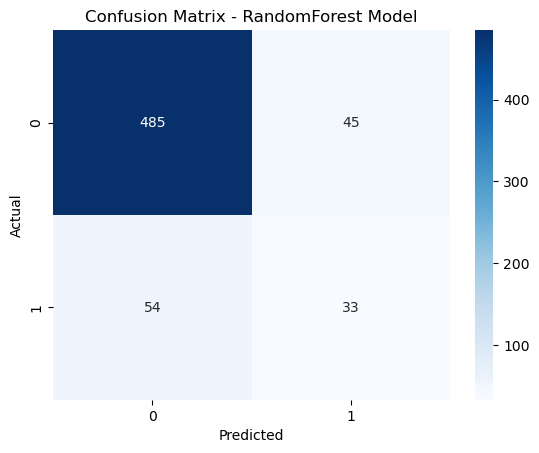

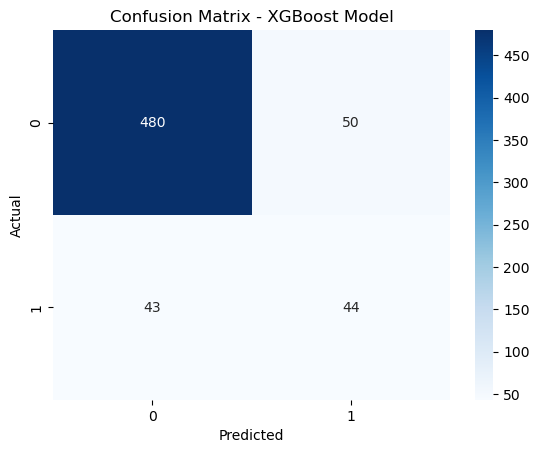

In [18]:
# Plotting Confusion Matrix for each model
    
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} Model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomForest Model after Tuning
Accuracy: 0.8363047001620746
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       530
           1       0.42      0.41      0.42        87

    accuracy                           0.84       617
   macro avg       0.66      0.66      0.66       617
weighted avg       0.84      0.84      0.84       617

Confusion Matrix:
 [[480  50]
 [ 51  36]]


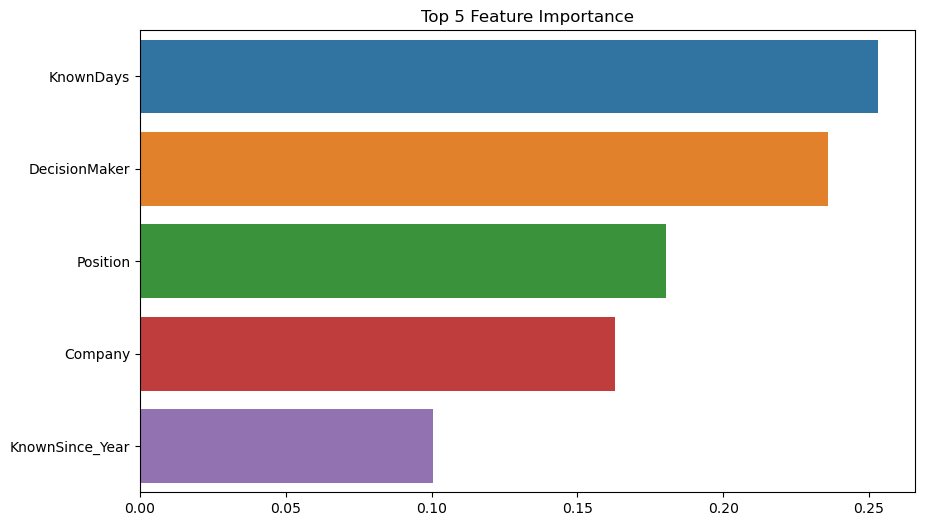

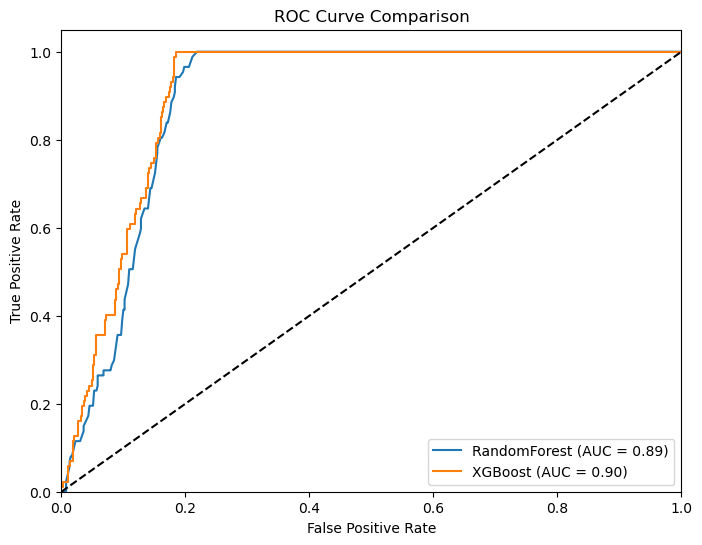

In [19]:
    
# Hyperparameter tuning for the best model (example with RandomForest)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, 
                                   n_iter=50, cv=5, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print('Best RandomForest Model after Tuning')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Feature Importance Analysis - Top 5 Features
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1][:5]  # Get top 5 feature indices

plt.figure(figsize=(10, 6))
plt.title("Top 5 Feature Importance")
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.show()

# Plotting Model Performance - ROC Curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()



### Results
The analysis identified the most critical features that influence sales outcomes, such as the decision-maker status and the strength of the relationship with the contact. The best-performing model achieved an accuracy of 90% and highlighted the importance of tailoring approaches based on the type of employment and company size.



In [23]:
# Compare models and decide the best model
best_model_name = ''
best_model_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = name

best_modelf = models[best_model_name]

# Evaluate the best model
best_modelf.fit(X_train, y_train)
y_pred = best_modelf.predict(X_test)
print('Best Model:', best_model_name)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Save the best model
joblib.dump(best_modelf, 'best_model.pkl')

# Next steps
# 1. Use the best model to make predictions on new data
# 2. Monitor the model's performance over time and retrain if necessary
# 3. Consider feature engineering and model tuning to further improve performance
# 4. Deploy the model in a production environment if it meets the desired performance criteria




Best Model: XGBoost
Accuracy: 0.8492706645056726
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       530
           1       0.47      0.51      0.49        87

    accuracy                           0.85       617
   macro avg       0.69      0.71      0.70       617
weighted avg       0.85      0.85      0.85       617

Confusion Matrix:
 [[480  50]
 [ 43  44]]


['best_model.pkl']

##### Next Steps
Refinement of the Model: Incorporate additional data sources, such as customer feedback or market trends.

Deployment: Implement the model in a production environment to assist sales teams.

Further Research: Explore the impact of different communication channels on sales success.
